Домашнее задание: Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

In [1]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


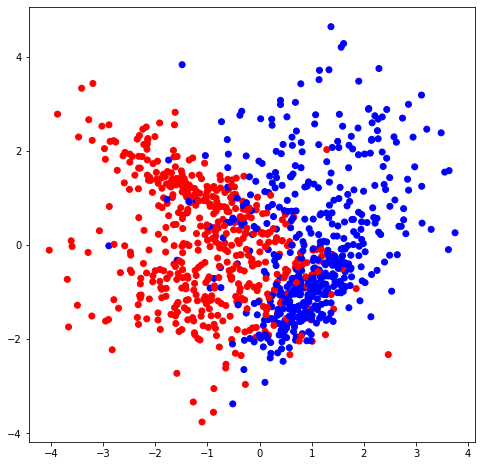

In [2]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# datasets.make_blobs(centers = 2, cluster_std = 1.5, random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [3]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (700, 2)
Размер массива признаков тестовой выборки (300, 2)
Размер массива ответов для обучающей выборки (700,)
Размер массива ответов для тестовой выборки (300,)


In [4]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [5]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)
y_predicted_train = mod.predict(X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.03530579 0.00033222]]
Точность на обучающей выборке: 85.714
Точность на тестовой выборке: 84.333


In [6]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return TP, FP, FN, TN

In [7]:
print("Для порога по вероятности 0.5 на тестовой выборке имеем:"+
      f" {confusion(mod.predict(X_test), y_test)}")
print("Для порога по вероятности 0.55 на тестовой выборке имеем:"+
      f" {confusion(mod.predict(X_test, 0.55), y_test)}")

Для порога по вероятности 0.5 на тестовой выборке имеем: (122, 31, 16, 131)
Для порога по вероятности 0.55 на тестовой выборке имеем: (0, 0, 138, 162)


# AUC_ROC

In [8]:
target = y_test
my_y_predicted_test = mod.predict(X_test)
order=np.argsort(my_y_predicted_test)
target=target[order]
my_y_predicted_test=my_y_predicted_test[order]

In [9]:
for _x, t in zip(my_y_predicted_test, target):
    print(f"Значение x:{_x} класс {t}")

Значение x:False класс 1
Значение x:False класс 1
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 1
Значение x:False класс 0
Значение x:False класс 1
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 1
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 1
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0
Значение x:False класс 0


In [10]:
bins_pos=target
bins_neg=1-target
num_pos, num_neg=np.sum(bins_pos), np.sum(bins_neg)
print(f'{num_pos} объектов положительного класса, {num_neg} объектов негативного класса')

138 объектов положительного класса, 162 объектов негативного класса


In [11]:
#Чувствительность, доля объектов негативного класса, которых при текущем значении предела
#правильно записали в негативный класс
TPR=np.concatenate([[0], np.cumsum(bins_neg)/num_neg])

#Ложно-позитивный уровень, доля объектов положительного класса, которых при текущем значении предела
#ошибочно записали в негативный класс
FPR=np.concatenate([[0], np.cumsum(bins_pos)/num_pos])

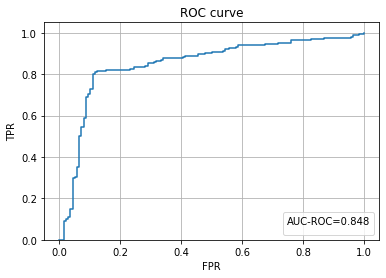

In [12]:
from numpy import trapz  # используем эту функцию для расчета площади под кривой
AUC_ROC = trapz(TPR, x = FPR, dx=0.1)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR)

In [13]:
from sklearn import metrics
fpr_sk, tpr_sk, thresholds_sk = metrics.roc_curve(mod.predict(X_test), y_test)
print(fpr_sk, tpr_sk)

[0.         0.10884354 1.        ] [0.         0.79738562 1.        ]


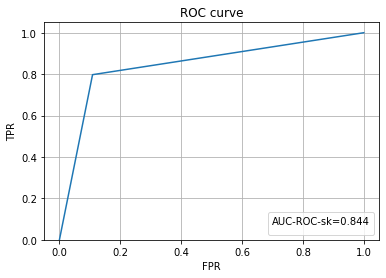

In [14]:
AUC_ROC_sk = trapz(tpr_sk, x = fpr_sk, dx=0.1)
plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC-sk={AUC_ROC_sk:.3f}', loc='lower right')
plt.plot(fpr_sk, tpr_sk)

In [15]:
precision=np.cumsum(bins_neg)/(np.cumsum(bins_neg)+np.cumsum(bins_pos))
precision

array([0.        , 0.        , 0.33333333, 0.5       , 0.6       ,
       0.66666667, 0.71428571, 0.75      , 0.77777778, 0.8       ,
       0.81818182, 0.83333333, 0.84615385, 0.85714286, 0.86666667,
       0.875     , 0.88235294, 0.83333333, 0.84210526, 0.8       ,
       0.80952381, 0.81818182, 0.7826087 , 0.79166667, 0.8       ,
       0.80769231, 0.81481481, 0.82142857, 0.82758621, 0.8       ,
       0.80645161, 0.8125    , 0.81818182, 0.82352941, 0.82857143,
       0.83333333, 0.83783784, 0.84210526, 0.84615385, 0.85      ,
       0.85365854, 0.85714286, 0.86046512, 0.86363636, 0.86666667,
       0.86956522, 0.87234043, 0.875     , 0.87755102, 0.88      ,
       0.88235294, 0.88461538, 0.88679245, 0.88888889, 0.87272727,
       0.875     , 0.85964912, 0.86206897, 0.86440678, 0.86666667,
       0.86885246, 0.87096774, 0.87301587, 0.875     , 0.87692308,
       0.86363636, 0.86567164, 0.86764706, 0.86956522, 0.87142857,
       0.87323944, 0.875     , 0.87671233, 0.87837838, 0.88   

In [16]:
recall = TPR
recall

array([0.        , 0.        , 0.        , 0.00617284, 0.01234568,
       0.01851852, 0.02469136, 0.0308642 , 0.03703704, 0.04320988,
       0.04938272, 0.05555556, 0.0617284 , 0.06790123, 0.07407407,
       0.08024691, 0.08641975, 0.09259259, 0.09259259, 0.09876543,
       0.09876543, 0.10493827, 0.11111111, 0.11111111, 0.11728395,
       0.12345679, 0.12962963, 0.13580247, 0.14197531, 0.14814815,
       0.14814815, 0.15432099, 0.16049383, 0.16666667, 0.17283951,
       0.17901235, 0.18518519, 0.19135802, 0.19753086, 0.2037037 ,
       0.20987654, 0.21604938, 0.22222222, 0.22839506, 0.2345679 ,
       0.24074074, 0.24691358, 0.25308642, 0.25925926, 0.2654321 ,
       0.27160494, 0.27777778, 0.28395062, 0.29012346, 0.2962963 ,
       0.2962963 , 0.30246914, 0.30246914, 0.30864198, 0.31481481,
       0.32098765, 0.32716049, 0.33333333, 0.33950617, 0.34567901,
       0.35185185, 0.35185185, 0.35802469, 0.36419753, 0.37037037,
       0.37654321, 0.38271605, 0.38888889, 0.39506173, 0.40123

# AUC_PR

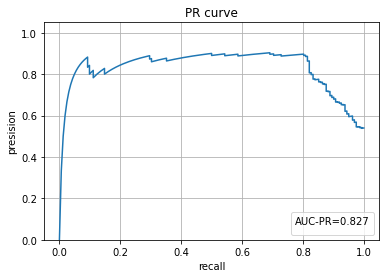

In [17]:
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)